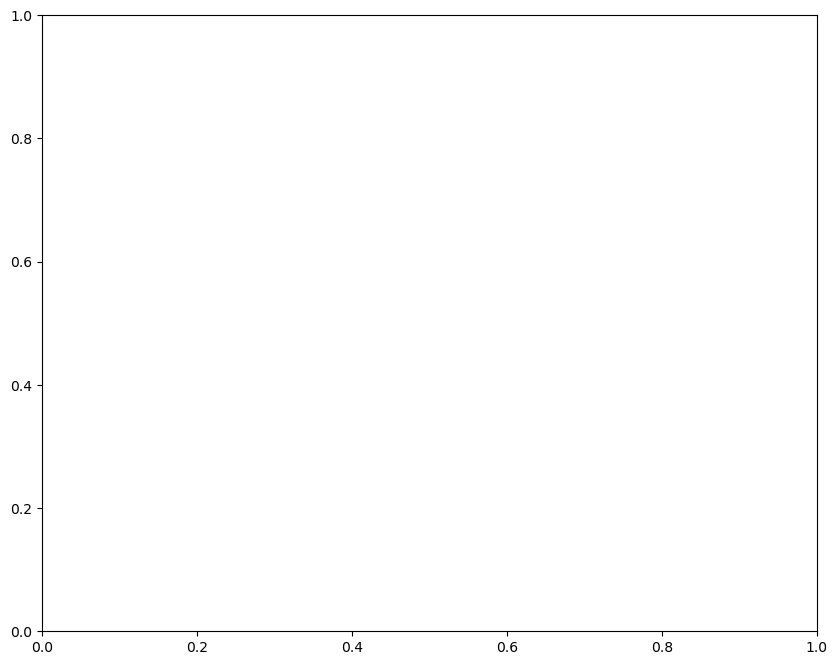

In [20]:
import tkinter as tk
from tkinter import ttk,messagebox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class No:
    def __init__(self,valor):
        self.valor = valor
        self.esquerdo = None
        self.direito = None

class ABB:
    def __init__(self):
        self.raiz = None
    
    def inserir(self,valor):
        if self.raiz is None:
            self.raiz = No(valor)
        else:
            self._inserir_recursivo(self.raiz,valor)

    def _inserir_recursivo(self,no_atual,valor):
        if valor < no_atual.valor:
            if no_atual.esquerdo is None:
                no_atual.esquerdo = No(valor)
            else:
                self._inserir_recursivo(no_atual.esquerdo, valor)
        else:
            if no_atual.direito is None:
                no_atual.direito = No(valor)
            else:
                self._inserir_recursivo(no_atual.direito, valor)
    
    def tamanho_da_arvore(self,no):
        if no is None:
            return 0
        
        return 1 + self.tamanho_da_arvore(no.esquerdo) + self.tamanho_da_arvore(no.direito)
        
    def calcular_posicoes(self,no,profundidade=0,posicao=0,posicoes=None,deslocamento=1.5):
        if posicoes is None:
            posicoes = {}
        
        if no:
            posicoes[no.valor] = (posicao,-profundidade)
            deslocamento_esquerdo = self.tamanho_da_arvore(no.esquerdo)
            deslocamento_direito = self.tamanho_da_arvore(no.direito)

            if no.esquerdo:
                posicoes = self.calcular_posicoes(no.esquerdo, profundidade+1, posicao-deslocamento*(deslocamento_direito+1), posicoes)
            
            if no.direito:
                posicoes = self.calcular_posicoes(no.direito, profundidade+1, posicao+deslocamento*(deslocamento_esquerdo+1), posicoes)

        return posicoes

    def criar_grafo(self,no_atual=None, G=None):
        if G is None:
            G = nx.DiGraph()
        
        if no_atual:
            if no_atual.esquerdo:
                G.add_edge(no_atual.valor, no_atual.esquerdo.valor)
                self.criar_grafo(no_atual.esquerdo,G)
            if no_atual.direito:
                G.add_edge(no_atual.valor, no_atual.direito.valor)
                self.criar_grafo(no_atual.direito,G)
        
        return G
    

class InterfaceABB:
    def __init__(self, janela_principal):
        self.janela = janela_principal
        self.janela.title("Interface Gráfica para ABB")
        
        self.arvore = ABB()

        frame_entrada = tk.Frame(self.janela)
        frame_entrada.pack(pady=20,padx=20,fill=tk.X)

        tk.Label(frame_entrada,text="Valor: ",font="Arial 16").grid(row=0,column=0,padx=10,pady=5,sticky=tk.W)
        self.campo_valor = tk.Entry(frame_entrada,font="Arial 16")
        self.campo_valor.grid(row=0,column=1,padx=10,pady=5,sticky=tk.W)

        self.botao_inserir = tk.Button(frame_entrada,
                                       text="Inserir",
                                       command=self.adicionar_valor)
        self.botao_inserir.grid(row=0,column=2,padx=10,pady=5)

        self.figura, self.eixo = plt.subplots(figsize=(10,8))
        
        self.canvas = FigureCanvasTkAgg(self.figura,self.janela)
        self.canvas.get_tk_widget().pack(pady=10)


    def adicionar_valor(self):
        try:
            valor = int(self.campo_valor.get())
            self.arvore.inserir(valor)
            self.atualizar_desenho()
            self.campo_valor.delete(0,tk.END)

        except ValueError:
            messagebox.showerror("Erro","Por favor, insira um número válido")

    def atualizar_desenho(self):
        self.eixo.clear()

        grafo = self.arvore.criar_grafo(self.arvore.raiz)

        posicoes = self.arvore.calcular_posicoes(self.arvore.raiz)

        nx.draw(grafo, posicoes, with_labels=True, arrows=False, node_size=2000, node_color='skyblue', ax=self.eixo)

        self.canvas.draw()

if __name__ == "__main__":
    janela = tk.Tk()
    app = InterfaceABB(janela)
    janela.mainloop()

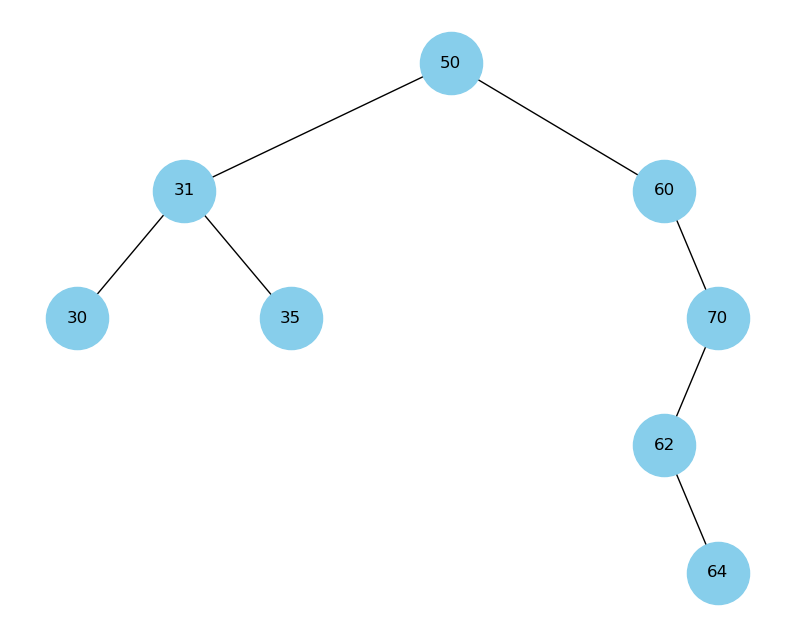

In [24]:
import tkinter as tk
from tkinter import ttk, messagebox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class No:

    def __init__(self, valor):
        
        self.valor = valor
        self.esquerdo = None
        self.direito = None

class ABB:

    def __init__(self):
        self.raiz = None

    def inserir(self, valor):
        
        if self.raiz is None:
            self.raiz = No(valor)
            
        else:
            self._inserir_recursivo(self.raiz, valor)
    
    def _inserir_recursivo(self, no_atual, valor):

        if valor < no_atual.valor:
            if no_atual.esquerdo is None:
                no_atual.esquerdo = No(valor)
                
            else:
                self._inserir_recursivo(no_atual.esquerdo, valor)
                
        else:
            if no_atual.direito is None:
                no_atual.direito = No(valor)
                
            else:
                self._inserir_recursivo(no_atual.direito, valor)

    def tamanho_da_subarvore(self, no):

        if no is None:
            return 0

        return 1 + self.tamanho_da_subarvore(no.esquerdo) + self.tamanho_da_subarvore(no.direito)

    def calcular_posicoes(self, no, profundidade=0, posicao=0, posicoes=None, deslocamento=1.5):

        if posicoes is None:
            posicoes = {}

        if no:
            posicoes[no.valor] = (posicao, -profundidade)
            deslocamento_esquerdo = self.tamanho_da_subarvore(no.esquerdo)
            deslocamento_direito = self.tamanho_da_subarvore(no.direito)
            if no.esquerdo:
                posicoes = self.calcular_posicoes(no.esquerdo, profundidade+1, posicao-deslocamento*(deslocamento_direito+1), posicoes)

            if no.direito:
                posicoes = self.calcular_posicoes(no.direito, profundidade+1, posicao+deslocamento*(deslocamento_esquerdo+1), posicoes)

        return posicoes

    def criar_grafo(self, no_atual=None, G=None):

        if G is None:
            G = nx.DiGraph()

        if no_atual:
            if no_atual.esquerdo:
                G.add_edge(no_atual.valor, no_atual.esquerdo.valor)
                self.criar_grafo(no_atual.esquerdo, G)
            if no_atual.direito:
                G.add_edge(no_atual.valor, no_atual.direito.valor)
                self.criar_grafo(no_atual.direito, G)

        return G

    def excluir(self, valor):

        if self.raiz:
            self.raiz = self._excluir_recursivo(self.raiz, valor)
    
    def _excluir_recursivo(self, no_atual, valor):

        if not no_atual:
            return no_atual

        if valor < no_atual.valor:
            no_atual.esquerdo = self._excluir_recursivo(no_atual.esquerdo, valor)

        elif valor > no_atual.valor:
            no_atual.direito = self._excluir_recursivo(no_atual.direito, valor)

        else:
            if not no_atual.esquerdo:
                return no_atual.direito

            elif not no_atual.direito:
                return no_atual.esquerdo
            no_atual.valor = self._valor_minimo(no_atual.direito)
            no_atual.direito = self._excluir_recursivo(no_atual.direito, no_atual.valor)

        return no_atual
    
    def _valor_minimo(self, no):
        
        valor_atual = no.valor
        while no.esquerdo:
            valor_atual = no.esquerdo.valor
            no = no.esquerdo

        return valor_atual
    
    def atualizar(self, valor_antigo, valor_novo):
        self.excluir(valor_antigo)
        self.inserir(valor_novo)

    def buscar(self, valor):
        return self._buscar_recursivo(self.raiz, valor)
    
    def _buscar_recursivo(self, no_atual, valor):
        if no_atual is None:
            return False

        if no_atual.valor == valor:
            return True

        if valor < no_atual.valor:
            return self._buscar_recursivo(no_atual.esquerdo, valor)

        return self._buscar_recursivo(no_atual.direito, valor)
                
class InterfaceABB:
    
    def __init__(self, janela_principal):
        self.janela = janela_principal
        self.janela.title("Interface Gráfica para ABB")

        self.arvore = ABB()

        frame_entrada = ttk.Frame(janela_principal)
        frame_entrada.pack(pady=20, padx=20, fill=tk.X)
        
        ttk.Label(frame_entrada, text="Valor: ", font="Arial 16").grid(row=0, column=0, padx=10, pady=5, sticky=tk.W)
        self.campo_valor = ttk.Entry(frame_entrada, font="Arial 16")
        self.campo_valor.grid(row=0, column=1, padx=10, pady=5, sticky=tk.EW)
        
        self.botao_inserir = ttk.Button(frame_entrada,
                                        text="Inserir", 
                                        command=self.adicionar_valor)
        self.botao_inserir.grid(row=0, column=2, padx=10, pady=5)

        self.botao_excluir = ttk.Button(frame_entrada, 
                                        text="Excluir", 
                                        command=self.excluir_valor)
        self.botao_excluir.grid(row=0, column=3, padx=10, pady=5)

        ttk.Label(frame_entrada, 
                  text="Atualizar: ", font="Arial 16").grid(row=1, column=0, padx=10, pady=5, sticky=tk.W)
        self.campo_valor_antigo = ttk.Entry(frame_entrada, font="Arial 16")
        self.campo_valor_antigo.grid(row=1, column=1, padx=10, pady=5, sticky=tk.EW)

        ttk.Label(frame_entrada, text="para: ", font="Arial 16").grid(row=1, column=2, padx=10, pady=5)
        self.campo_valor_novo = ttk.Entry(frame_entrada, font="Arial 16")
        self.campo_valor_novo.grid(row=1, column=3, padx=10, pady=5, sticky=tk.EW)

        self.botao_atualizar = ttk.Button(frame_entrada, 
                                          text="Atualizar", 
                                          command=self.atualizar_valor)
        self.botao_atualizar.grid(row=1, column=4, padx=10, pady=5)

        frame_entrada.columnconfigure(1, weight=1)
        frame_entrada.columnconfigure(3, weight=1)

        self.figura, self.eixo = plt.subplots(figsize=(10, 8))

        self.canvas = FigureCanvasTkAgg(self.figura, janela_principal)
        self.canvas.get_tk_widget().pack(pady=10)
        
        
        ttk.Label(frame_entrada, text="Buscar: ", font="Arial 16").grid(row=2, column=0, padx=10, pady=5, sticky=tk.W)
        self.campo_busca = ttk.Entry(frame_entrada)
        self.campo_busca.grid(row=2, column=1, padx=10, pady=5, sticky=tk.EW)
        
        self.botao_buscar = ttk.Button(frame_entrada, 
                                       text="Buscar", 
                                       command=self.buscar_valor)
        self.botao_buscar.grid(row=2, column=2, padx=10, pady=5)
    
    def adicionar_valor(self):
        try:
            valor = int(self.campo_valor.get())
            self.arvore.inserir(valor)
            self.atualizar_desenho()
            self.campo_valor.delete(0, tk.END)

        except ValueError:
            messagebox.showerror("Erro", "Por favor, insira um número válido.")
            
    def excluir_valor(self):

        try:
            valor = int(self.campo_valor.get())
            self.arvore.excluir(valor)
            self.atualizar_desenho()
            self.campo_valor.delete(0, tk.END)

        except ValueError:
            messagebox.showerror("Erro", "Por favor, insira um número válido.")
            
    def atualizar_valor(self):        

        try:
            valor_antigo = int(self.campo_valor_antigo.get())
            valor_novo = int(self.campo_valor_novo.get())
            self.arvore.atualizar(valor_antigo, valor_novo)
            self.atualizar_desenho()
            self.campo_valor_antigo.delete(0, tk.END)
            self.campo_valor_novo.delete(0, tk.END)

        except ValueError:
            messagebox.showerror("Erro", "Por favor, insira números válidos.")
            
    def atualizar_desenho(self):

        self.eixo.clear()
        grafo = self.arvore.criar_grafo(self.arvore.raiz)
        posicoes = self.arvore.calcular_posicoes(self.arvore.raiz)
        nx.draw(grafo, posicoes, with_labels=True, arrows=False, node_size=2000, node_color='skyblue', ax=self.eixo)
        self.canvas.draw()
        
    def buscar_valor(self):
        try:
            valor = int(self.campo_busca.get())
            existe = self.arvore.buscar(valor)

            if existe:
                messagebox.showinfo("Resultado", f"O valor {valor} está presente na árvore.")
            else:
                messagebox.showwarning("Resultado", f"O valor {valor} não foi encontrado na árvore.")

            self.campo_busca.delete(0, tk.END)

        except ValueError:
            messagebox.showerror("Erro", "Por favor, insira um número válido.")
            
if __name__ == "__main__":
    janela = tk.Tk()
    app = InterfaceABB(janela)
    janela.mainloop()